# Problem 2: Topic Modeling [60 points]

When exploring large text collections, it is a good idea to do some preliminary/exploratory  analysis, for which topic modeling is an excellent tool.

In the first part of the assignment you will

<ul>
<li>Learn how to train LDA topic models.</li>
<li>Perform model selection by perplexity analysis.</li>
<li>Study word distributions using word clouds.</li>
<li>Cluster documents by topic-distribution representations.</li>
<li>Analyze and make sense of document clusters.</li>
</ul>

Follow the instructions and consecutive steps in the assignment. You are reqired to answer the questions in bold face. However, you need to follow the instructions sequentially.

<b>Disclaimer:</b> The instructions below are geared towards Python users, but you are free to adapt them to your specific environment (e.g. Matlab, R, etc.).

### Set up

We strongly recommend that you work with Python for the assignment, as we provide partial code for Python users. 

If you have a lot of programming experience, on the other hand, you should be able to adapt the provided code and follow the instructions in any other programming language you are familiar with.

To perform topic modeling we will use the Gensim library. To install `gensim`, run (in command shell)

`pip install gensim`

Start by importing necessary packages. In this part, we will use Python data frames to manage the dataset.

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import logging, gensim, bz2

### Download and read-in data file

In this part, you will analyze posts from a political forum.  Download the documents file called `docs_sample.txt` from Canvas. It is a comma-separated file in the format: `user-name,post-id,post-text`. The `post-text` is already pre-processed into stemmed and lemmatized words for you.

Run the code below, which imports the data into a data frame called `data`, prints the number of rows and columns, and some sample posts.

In [109]:
# Simply run this code
data = pd.read_csv('docs_sample.txt', sep=',', header=0)
data.columns = ['username', 'postid', 'text']

print(data.shape)

data.head()


(1200, 3)


,username,postid,text
0,dixnickson,post_1061386105,record comment quot respons cadi justic crime ...
1,giftedone,post_1060886809,good sourc well fact folk bad sourc good sourc...
2,otter,post_4347769,clear understand risk group site compli list p...
3,goldwater,post_4034478,feel great champion mother kill trimest fetu w...
4,pasithea,post_1061584891,well good luck healthcar provid agre thing wro...


### Preparing data for gensim LDA

Next we prepare the data for topic modeling, where the post string will be split into tokens (individual words).

In [110]:
# Simply run this code
# array of tokens
tokendata = data["text"].apply(lambda x: x.split())
dictionary = gensim.corpora.Dictionary(tokendata)
corpus = [dictionary.doc2bow(text) for text in tokendata]

n=len(corpus)
print(n)

1200


### 2.1 LDA

Using gensim library's LDA model, you can extract k=10 topics using the following code.
Note that LDA optimization will take several minutes to complete.

In [111]:
k = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k, id2word = dictionary, passes=10)

In [112]:
ldamodel.save('saved_model.lda')
from gensim.models import LdaModel
lda = LdaModel.load('saved_model.lda')


In general, we do not know how many topics to extract from the data. In practice, one would try a different number of topics and pick the "best" one. Here "best" is often quantified based on the likelihood of the model on some held-out documents. To this end, a measure called `perplexity` is used, which is proportional to $perplexity=2^{(-likelihood)}$.  As such, the smaller the perplexity, the better. 

In this assignment, you will run LDA for $k=[2, 3, 5, 10, 20, 30, 50]$ and use the `log_perplexity` function to compute the <u>per-word likelihood bound</u> of each model on the corpus itself.

Since running LDA takes time, it would be wise to `save` these models as we train them, so that we can `load` the "best" model later on directly.

> <b>1) [10 points] Run `gensim LDA` for $k=[2,3,5, 10, 20, 30, 50]$ on train corpus. Compute the per-word likelihood bound of each model on the corpus and save the models on disk. You will find functions `save` and `log_perplexity` useful. 
For others, and more information on gensim API, see <a href="https://radimrehurek.com/gensim/models/ldamodel.html">this documentation</a>.</b>

In [26]:
k = [2, 3, 5, 10, 20, 30,50];
px = np.zeros(len(k))

print len(k)
# YOUR CODE HERE

for i in range(0,len(k)):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=k[i], id2word = dictionary, passes=10)
    px[i] = ldamodel.log_perplexity(corpus)
    ldamodel.save('saved_model_' + str(k[i]))
    

7


> <b>2) [3 points] Plot the per-word likelihood bound versus $k$. What do you observe? Which $k$ would you use for your model? What is the perplexity estimate for your choice of model? </b>
<br>


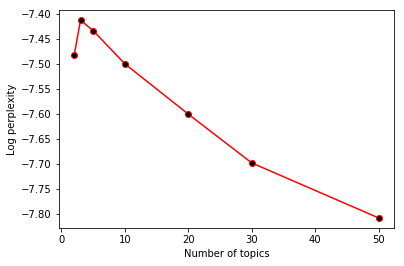

In [27]:
# YOUR CODE HERE
plt.plot(k[:],px[:], 'r',linestyle='-', marker='o',markerfacecolor = 'black');
plt.xlabel('Number of topics')
plt.ylabel('Log perplexity')
plt.show()

><b> Explanation</b>

>We observe from the graph above that for k = 3 (number of topics as 3), the per-word likelihood bound is the highest and for k = 50, it is the lowest. Hence the perplexity 2^(-bound) is the lowest for k = 3 and highest for k = 50. 

>Since we are interested in the model with lowest perplexity, we choose k = 3 as the optimal model. The perplexity estimate for k = 3 is 170.40538 as computed in the code snippet below.

In [42]:
#Printing log perplexity(per-word likelihood bound) & perplexity for k = 3
print ('For k = 3')
print('Per-word likelihood bound',px[1])
print('Perplexity estimate',np.power(2,-px[1]))



For k = 3
('Per-word likelihood bound', -7.4128270746450173)
('Perplexity', 170.40538001735783)


> <b>3) [2 points] Set $k$ to your choice from above, and `load` the corresponding model you saved on disk.</b>

In [113]:
from gensim.models import LdaModel
lda = LdaModel.load('saved_model_3')

> <b> 4) [5 points] Print the top 30 words for each topic. See the <a href="https://radimrehurek.com/gensim/models/ldamodel.html">API documentation</a>, where you may find the `show_topic` function useful. </b> 

In [117]:
# YOUR CODE HERE
print ("Top 30 words from:")
print ("Topic 0")
lda.show_topic(0, topn=30)

Top 30 words from:
Topic 0


[(u'tax', 0.028270333201653734),
 (u'govern', 0.013076087741845883),
 (u'pay', 0.0098438085548566388),
 (u'incom', 0.0095611737238452208),
 (u'peopl', 0.0093239084147172732),
 (u'will', 0.0086822218678362807),
 (u'money', 0.0082260136347152533),
 (u'spend', 0.0075891657996509281),
 (u'year', 0.0069186657224055582),
 (u'person', 0.0057060034943068379),
 (u'rate', 0.0055958497657302032),
 (u'increas', 0.0055701588858068736),
 (u'debt', 0.0054823648162402273),
 (u'cost', 0.0053456326612456237),
 (u'invest', 0.0051538808179690861),
 (u'state', 0.0048829900162794659),
 (u'cut', 0.0044456787346735874),
 (u'economi', 0.0044257595777302027),
 (u'rich', 0.0042718785165496058),
 (u'work', 0.0038896416537115672),
 (u'time', 0.0038187526330531905),
 (u'privat', 0.0037332937282736883),
 (u'good', 0.0035602470581784442),
 (u'revenu', 0.0034795719838043556),
 (u'system', 0.0034738144980467991),
 (u'social', 0.0034341054142354426),
 (u'obama', 0.0034172355574145995),
 (u'feder', 0.0033741387712168491)

In [118]:
print ("Top 30 words from:")
print ("Topic 1")
lda.show_topic(1, topn=30)

Top 30 words from:
Topic 1


[(u'god', 0.017853829306141652),
 (u'peopl', 0.012063079954363733),
 (u'will', 0.0095027118930669716),
 (u'christian', 0.0082671831354679867),
 (u'religion', 0.0067575729252112608),
 (u'atheist', 0.0064420757962651539),
 (u'thing', 0.0059346656465166401),
 (u'time', 0.0045844024371519358),
 (u'bibl', 0.0045465771141702518),
 (u'church', 0.004183181526620396),
 (u'muslim', 0.0041750396444997706),
 (u'claim', 0.004040315367171564),
 (u'fact', 0.0040052049911589501),
 (u'islam', 0.0038581119231619367),
 (u'faith', 0.0037420510144380199),
 (u'good', 0.0037352798800937199),
 (u'well', 0.0034550789743727612),
 (u'understand', 0.0034210997513270361),
 (u'read', 0.0033995942927503887),
 (u'jesu', 0.0033586843818017667),
 (u'book', 0.0033081015538253505),
 (u'point', 0.0032439117623781649),
 (u'year', 0.003064181477199703),
 (u'wrong', 0.0030574649489927093),
 (u'post', 0.0030547202501569836),
 (u'live', 0.0030228114379415431),
 (u'life', 0.0030163675990750754),
 (u'religi', 0.00299014493936911

In [119]:
print ("Top 30 words from:")
print ("Topic 2")
lda.show_topic(2, topn=30)

Top 30 words from:
Topic 2


[(u'abort', 0.019825888339710308),
 (u'human', 0.018274483725765109),
 (u'life', 0.01425624269529796),
 (u'person', 0.0085594597342148731),
 (u'women', 0.0077250474776329112),
 (u'woman', 0.0075888158740466932),
 (u'will', 0.0073765301303983424),
 (u'god', 0.0061105006020644222),
 (u'kill', 0.0058212650464369246),
 (u'exist', 0.0056822787393358597),
 (u'peopl', 0.0056390860468795555),
 (u'fetu', 0.0056208413942011645),
 (u'child', 0.0054072619665389192),
 (u'law', 0.0052437482540334439),
 (u'time', 0.0047990495700059492),
 (u'right', 0.0046930978582092565),
 (u'cell', 0.0046868260956883763),
 (u'bodi', 0.0044912083539059167),
 (u'babi', 0.0044557177125589056),
 (u'argument', 0.0041772234389108095),
 (u'mother', 0.0040978318237993479),
 (u'develop', 0.0040666458578471716),
 (u'live', 0.0040386094707125517),
 (u'zygot', 0.0040043597294849766),
 (u'pregnanc', 0.0038694035949450112),
 (u'sex', 0.003840368326444812),
 (u'legal', 0.0038184059701725673),
 (u'choic', 0.0035856247478852962),
 (

### 2.2 Word Clouds

Often visualizing data is helpful for sense-making complex data like text. Wordclouds are a great tool for visualizing word distributions, where words are shown as a cloud and the size of each word is proportional to its "importance" in the specific context. In case of topic models, importance of a word differs from topic to topic.

Install `wordcloud` via `pip install wordcloud` and run the below code to import.

In [8]:
from wordcloud import WordCloud

We provide you with the following functionality to visualize wordclouds. It calls a function called `termList` with two parameters: topic ID, and number of words to visualize.

> <b> 5) [5 points] Implement the `termList` function. Then, $<$FILL IN$>$ the line in `wordcloudgen` to visualize 30 words per topic. </b> 

In [14]:
def wordcloudgen(n_topics):
    for K in range(n_topics):
        wc = WordCloud().fit_words(frequencies=dict(termList(K,30)))
        print("Topic # "+ str(K))
        plt.imshow(wc)
        plt.show()
        plt.close()
 

# YOUR CODE HERE
def termList(topicID, numberOfWords):
    return lda.show_topic(topicID, topn=numberOfWords)
    
    
    

> <b> 6) [5 points] Call `wordcloudgen` to generate the wordclouds for the topics from your model with $k$ topics from step 3). What do you observe? What subjects do the political posts in your document sample talk about? Looking at the word clouds, give short names to each topic.</b> 
<br>

Topic # 0


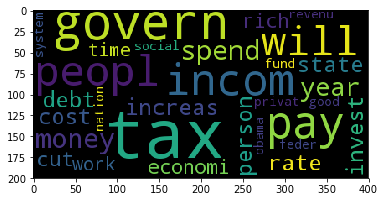

Topic # 1


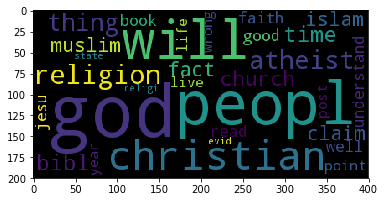

Topic # 2


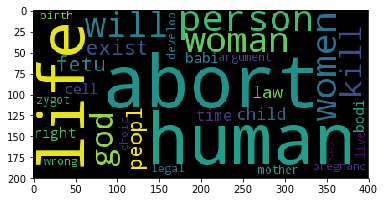

In [16]:
# YOUR CODE HERE
wordcloudgen(3)

><b> Explanation</b>

>We observe that the 3 wordclouds talk about different topics and the importance of the larger font words is higher since they are key/important to defining the topic.

>The political posts are represented by Topic 0.It talks about the taxes imposed by government, income of the citizens, expenditure by the government, investment by government, debts, etc.

>Topic 0 : Government and finances

>Topic 1 : Religions and people

>Topic 2: Female foeticide

### 2.3 Topic Probability Distribution of Documents

Next we will transform the documents from word count representation to topic probability distribution representation. To do so, you may find the `get_document_topics` function in the the <a href="https://radimrehurek.com/gensim/models/ldamodel.html">API documentation</a> useful.  This function returns (topic_id, topic_probability) 2-tuples per document. Note that the number of such tuples might be different for each document.

> <b> 7) [5 points] Obtain the topic distribution of documents in `corpus` from your model. Specifically, create a new $(n,k)$ dimensional `doc_topic_dist` matrix for the topic probability distribution of documents. As a sanity check, sum the rows of the `doc_topic_dist` matrix, each of which should be close to 1. </b> 

In [120]:
# YOUR CODE HERE
doc_topic_dist = np.zeros((len(corpus),3))

for i in range(0,len(corpus)):
    #Minimum probability is kept zero in order to get some probability value
    #for each topic
    a = lda.get_document_topics(corpus[i],minimum_probability=0)
    doc_topic_dist[i][0] = a[0][1]
    doc_topic_dist[i][1] = a[1][1]
    doc_topic_dist[i][2] = a[2][1]

print(np.sum(doc_topic_dist,axis=1))  # this should print a length-n vector with entries close to 1.   

[ 1.  1.  1. ...,  1.  1.  1.]


> <b> 8) [3 points] Compute and print the column sums of `doc_topic_dist` matrix. Briefly state any conclusions you can draw.</b> <br>


In [52]:
# YOUR CODE HERE
#Columnwise sum of doc_topic_dist
print(np.sum(doc_topic_dist,axis=0))

[ 395.14291867  408.52250724  396.33457409]


><b> Conclusion drawn</b>

>We observe that the value(sum of probabilities of occurence) for Topic 1 is the highest as compared to Topic 0 and Topic 2.

>So, we can infer that the number of documents relating to Topic 1 are higher in the corpus as compared to documents relating to Topic 0 or Topic 2. 

### 2.4 Clustering Documents by Topic Distributions

Next we will cluster the documents based on their topic probability distributions, that is, we will use the `doc_topic_dist` matrix.

For clustering we will use the KMeans implementation from `sklearn`, for which the API can be found <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">here</a>.

> <b> 9) [5 points] Run `KMeans` clustering on `doc_topic_dist` using $C = [2, 3, 5, 10, 20, 30, 50]$ number of clusters. For each clustering, compute and store the objective score. Here,you may find the `score` function of the API (see link above) useful. </b> <br><br>
<b> 10) [2 points] Plot $C = [2, 3, 5, 10, 20, 30, 50]$ vs. the objective score. What do you observe? State briefly. </b>


[-321.03979546  -53.29834285  -25.03136968   -7.86217003   -2.65681579
   -1.48470414   -0.62163757]


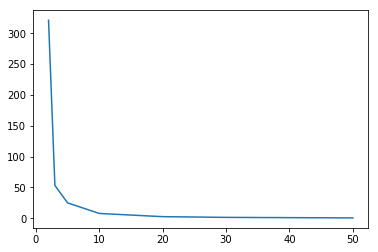

In [121]:
from sklearn.cluster import KMeans

C = [2, 3, 5, 10, 20, 30, 50];
kmeans_obj = np.zeros(len(C))
for i in range(0,len(C)):
    # YOUR CODE HERE
    kmeans = KMeans(n_clusters=C[i], random_state=0).fit(doc_topic_dist)
    kmeans_obj[i] = kmeans.score(doc_topic_dist)
       
print(kmeans_obj)
plt.plot(C,-kmeans_obj)
plt.show()    


><b> Observation </b>

>The score variable denotes the percentage of variance explained by the number of clusters. 

>We observe that after the knee point which is no. of clusters = 5, the plot becomes constant. This means that addition of more clusters than this knee value reduces the distinction among the clusters.


> <b> 11) [4 points] Train a `KMeans` model with $C = 5$ again and print the cluster centers. (Here, you may find the cluster "Attributes" of the API (see link above) useful.)
Briefly state your observations, by looking at the centers. In particular, how would you characterize these clusters?</b>


In [122]:
C=5
kmeans = KMeans(n_clusters=C, random_state=321).fit(doc_topic_dist)
# YOUR CODE HERE
print kmeans.cluster_centers_


    

[[ 0.97887205  0.01090696  0.01022099]
 [ 0.04875698  0.46696806  0.48427497]
 [ 0.0413497   0.0320021   0.9266482 ]
 [ 0.02457262  0.94102171  0.03440568]
 [ 0.57994686  0.20733508  0.21271807]]


><b> Observation </b>

>We observe that 

>Cluster 1: represents documents related to Topic 0(Government and finances) since the cluster centre has                             highest probability(97 % approx.) for Topic 0 or in other words, the cluster centre is a document belonging to Topic 0.

>Cluster 2: represents documents involving Topic 1(Religion) and Topic 2(Female foeticide) words since                             the cluster centre has a probability of 46 % for Topic 1 and 48 % for Topic 2.

>Cluster 3: represents documents related to Topic 2(Female foeticide) since the cluster centre has                                 highest probability(92 % approx.) for Topic 2 or in other words, the cluster centre is a document belonging to Topic 2.

>Cluster 4: represents documents related to Topic 1(Religion) since the cluster centre has                                         highest probability(94 % approx.) for Topic 1 or in other words, the cluster centre is a document belonging to Topic 1.

>Cluster 5: represents documents involving majorly Topic 0(Government and finances) and minorly Topic 2(Female foeticide)                             words since the cluster centre has a probability of 57 % for Topic 1 and 21 % for Topic 2.




> <b> 12) [3 points] Next find the cluster assignments at convergence for the `KMeans` model with $C = 5$ clusters. (Again, you may find the cluster "Attributes" of the API (see link above) useful.) Plot the probability mass function of documents by cluster membership. What do you observe? Briefly state.</b><br>


Cluster assignments
[3 1 2 ..., 0 4 0]
Counts in every cluster
[323, 93, 342, 353, 89]


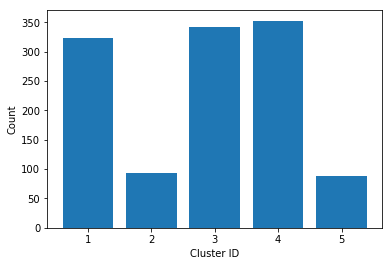

In [123]:
 # YOUR CODE HERE
import collections
p = kmeans.labels_
print ('Cluster assignments')
print p
counter=collections.Counter(p)
y = counter.values()
x = np.arange(5) + 1

print ('Counts in every cluster')
print y

plt.bar(x,y)
plt.xlabel('Cluster ID');plt.ylabel('Count');
plt.show()
    

><b> Observation </b>

>We observe that most of the documents lie in cluster 1,3 and 4. Intuitively this means that fewer documents contain words from two different topics as observed from 2 and 5 cluster. Or in other words, fewer documents are of the mixed membership type as compared to the number of pure membership documents. 

> 1,3 and 4 clusters are purer than 2 and 5 since they represent a single topic exclusively. Clusters 2 and 5 represent mixture of topics.


> <b> 13) [5 points] Next, you will find the document that is closest to the respective center within each cluster. For distance computation, use the `distance.euclidean` function. For each cluster $c=\{1,2,3,4,5\}$: print (i) the minimum distance and (ii) the (username,postid,text) triple for the corresponding document.  </b>

In [107]:
from scipy.spatial import distance
# YOUR CODE HERE
clu_cens = kmeans.cluster_centers_

for c in range(C):
    min_dist = np.inf
    min_ind = 0;
    for i in range(n):
        
        #Document compared should not be equal to cluster centre
        if(np.array_equal(doc_topic_dist[i],clu_cens[c]) == False):
            d = distance.euclidean(clu_cens[c],doc_topic_dist[i])
            if(d < min_dist):
                min_dist = d
                min_ind = i
                
    print ("\nCluster" + str(c + 1))
    print ("Minimum distance",min_dist)
    print ("Triple of document",data.iloc[min_ind,:])
    print ("Print text for document clearly for analysis")
    print data.ix[min_ind,"text"]
    print ("\n")
                
    


Cluster1
('Minimum distance', 0.005715848637354922)
('Triple of document', username                                                dan40
postid                                        post_1061807045
text        lie keyboard melt will lie liber plan tell lie...
Name: 943, dtype: object)
Print text for document clearly for analysis
lie keyboard melt will lie liber plan tell lie time will true failur rest liber fantasi insert fy discuss fy lame liber attempt deflect avoid fact obama presid deficit billion dollar presid deficit billion presid deficit trillion dollar obama lowest deficit billion second place belong democrat defend insan incompet rage obama



Cluster2
('Minimum distance', 0.04705020049655587)
('Triple of document', username                                             pasithea
postid                                           post_4679950
text        purpos school learn basic skill scienc english...
Name: 204, dtype: object)
Print text for document clearly for analysis
purpo

> <b> 14) [3 points] Analyze the "text" for each closest document per cluster. Discuss your observations briefly. How do the documents with "mixed membership" look like? Which keywords do you think make them "closer" to different clusters?  </b><br>

><b> Solution </b>

>The closest document for :

>Cluster 1 : is related purely to government and finances(purely topic 0)

>Cluster 2 : talks about educating women and some relation to religion( has mixed membership of topic 1 and 2)

>Cluster 3: is related purely to female foeticide(purely topic 2)

>Cluster 4: is related purely to religion(purely topic 1)

>Cluster 5: talks in a greater ratio about government policies and a lesser fraction is related to inequality to the female population ( has mixed membership of topic 0 and topic 2).

>The documents with mixed membership contain words in different proportions(defined by the probabilities) from both the topics. 

> For example, for cluster 2 closest document which has mixed membership, we observe that it contains words such as "prayer", "indoctrine" ,"pray", "moral",etc. which causes it to have partial membership of Topic 1(Religion) and words such as "family", "daughter","abort", etc. cause it to have partial membership of Topic 2(Female foeticide). Since cluster centre of 2 represents mixed membership of Topic 1 and Topic 2, this document is closer to cluster 2 and hence gets assigned to it. 

>Similarly depending on the proportion of words being from different topics(purely or mixed), the documents are considered to be closer to the respective cluster centres.

### The End